# 데이터 확인

### 1. train.csv : 학습 데이터
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
- Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


### 2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Species: 펭귄의 종을 나타내는 문자열
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
- Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
- Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
- Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Sex : 펭귄의 성별
- Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
- Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

# 데이터 불러오기

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df= pd.read_csv('dataset/train.csv')
tst_df= pd.read_csv('dataset/test.csv')

In [544]:
df.head(1)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550


<AxesSubplot:xlabel='Body Mass (g)'>

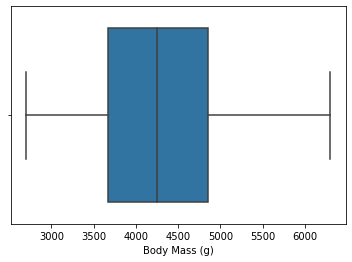

In [545]:
# 모든컬럼 이상치없음
sns.boxplot(x=df['Body Mass (g)'])

# 데이터 인코딩

In [546]:
# df.corr()['Sex']

In [547]:
df['Sex']=np.where(df['Sex'].values=='MALE',1,np.where(df['Sex'].values=='FEMALE',0,np.nan))
tst_df['Sex']=np.where(tst_df['Sex'].values=='MALE',1,np.where(tst_df['Sex'].values=='FEMALE',0,np.nan))
df['Clutch Completion']=np.where(df['Clutch Completion'].values=='Yes',1,0)
tst_df['Clutch Completion']=np.where(tst_df['Clutch Completion'].values=='Yes',1,0)
df = pd.concat([df,pd.get_dummies(df[['Island','Species']])],axis=1)
tst_df = pd.concat([tst_df,pd.get_dummies(tst_df[['Island','Species']])],axis=1)
df = df.drop(['Island','Species'],axis=1)
tst_df = tst_df.drop(['Island','Species'],axis=1)

# 결측값 삭제 및 대체

In [548]:
sex_features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)','Species_Adelie Penguin (Pygoscelis adeliae)',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'
       ]


In [549]:
# sex
from sklearn.ensemble import AdaBoostClassifier

sex_model = AdaBoostClassifier()
sex_model.fit(df[sex_features].iloc[df['Sex'].dropna().index],df['Sex'].iloc[df['Sex'].dropna().index])
df['Sex'].iloc[np.where(df['Sex'].isnull()==True)] =  sex_model.predict(df[df['Sex'].isnull()][sex_features])
tst_df['Sex'].iloc[np.where(tst_df['Sex'].isnull()==True)] =  sex_model.predict(tst_df[tst_df['Sex'].isnull()][sex_features])

In [550]:
Delta_features = ['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)','Species_Adelie Penguin (Pygoscelis adeliae)',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen','Sex'
       ]


In [551]:
# deltan
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor()
ada_model.fit(df[Delta_features].iloc[df['Delta 15 N (o/oo)'].dropna().index]
                               ,df['Delta 15 N (o/oo)'].iloc[df['Delta 15 N (o/oo)'].dropna().index])
df['Delta 15 N (o/oo)'].iloc[np.where(df['Delta 15 N (o/oo)'].isnull()==True)] =  ada_model.predict(df[df['Delta 15 N (o/oo)'].isnull()][Delta_features])
tst_df['Delta 15 N (o/oo)'].iloc[np.where(tst_df['Delta 15 N (o/oo)'].isnull()==True)] =  ada_model.predict(tst_df[tst_df['Delta 15 N (o/oo)'].isnull()][Delta_features])

In [552]:
# deltac
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(df[Delta_features].iloc[df['Delta 13 C (o/oo)'].dropna().index]
                               ,df['Delta 13 C (o/oo)'].iloc[df['Delta 13 C (o/oo)'].dropna().index])
df['Delta 13 C (o/oo)'].iloc[np.where(df['Delta 13 C (o/oo)'].isnull()==True)] =  lr_model.predict(df[df['Delta 13 C (o/oo)'].isnull()][Delta_features])
tst_df['Delta 13 C (o/oo)'].iloc[np.where(tst_df['Delta 13 C (o/oo)'].isnull()==True)] =  lr_model.predict(tst_df[tst_df['Delta 13 C (o/oo)'].isnull()][Delta_features])

In [553]:
# dfdf.dropna(inplace=True)
df.isnull().sum()

id                                                   0
Clutch Completion                                    0
Culmen Length (mm)                                   0
Culmen Depth (mm)                                    0
Flipper Length (mm)                                  0
Sex                                                  0
Delta 15 N (o/oo)                                    0
Delta 13 C (o/oo)                                    0
Body Mass (g)                                        0
Island_Biscoe                                        0
Island_Dream                                         0
Island_Torgersen                                     0
Species_Adelie Penguin (Pygoscelis adeliae)          0
Species_Chinstrap penguin (Pygoscelis antarctica)    0
Species_Gentoo penguin (Pygoscelis papua)            0
dtype: int64

In [554]:
tst_df.isnull().sum()

id                                                   0
Clutch Completion                                    0
Culmen Length (mm)                                   0
Culmen Depth (mm)                                    0
Flipper Length (mm)                                  0
Sex                                                  0
Delta 15 N (o/oo)                                    0
Delta 13 C (o/oo)                                    0
Island_Biscoe                                        0
Island_Dream                                         0
Island_Torgersen                                     0
Species_Adelie Penguin (Pygoscelis adeliae)          0
Species_Chinstrap penguin (Pygoscelis antarctica)    0
Species_Gentoo penguin (Pygoscelis papua)            0
dtype: int64

In [555]:
df.drop(['Clutch Completion'],axis=1,inplace=True)
tst_df.drop(['Clutch Completion'],axis=1,inplace=True)

In [556]:
tst_df.columns

Index(['id', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Island_Biscoe',
       'Island_Dream', 'Island_Torgersen',
       'Species_Adelie Penguin (Pygoscelis adeliae)',
       'Species_Chinstrap penguin (Pygoscelis antarctica)',
       'Species_Gentoo penguin (Pygoscelis papua)'],
      dtype='object')

In [557]:
df.columns = ["id",'clength','cdepth','flength','sex','nrate','crate','g',
                 'i_biscoe','i_dream','i_torgersen','s_adelie','s_chin','s_gentoo',]

tst_df.columns= ["id",'clength','cdepth','flength','sex','nrate','crate',
                 'i_biscoe','i_dream','i_torgersen','s_adelie','s_chin','s_gentoo',]

# normalization

In [558]:
# df_normalization = df[['clength', 'cdepth', 'flength', 'sex', 'nrate', 'crate']]
# tst_df_normalization = tst_df[['clength', 'cdepth', 'flength', 'sex', 'nrate', 'crate']]


# mean= df_normalization.mean(axis=0)
# df_normalization -= mean
# std= df_normalization.std(axis=0)
# df_normalization /= std

# tst_df_normalization -=mean
# tst_df_normalization /= std

In [559]:
# df.drop(['clength', 'cdepth', 'flength', 'sex', 'nrate', 'crate'],axis=1, inplace=True)
# tst_df.drop(['clength', 'cdepth', 'flength', 'sex', 'nrate', 'crate'],axis=1, inplace=True)

# df= pd.concat([df,df_normalization],axis=1)
# tst_df= pd.concat([tst_df,tst_df_normalization],axis=1)

In [560]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

sc_cols = ['clength', 'cdepth', 'flength', 'nrate', 'crate']

ptsc= PowerTransformer()

def scaling_pt(df, col):
    df[col] = ptsc.fit_transform(df[col])
    return df


# df = scaling_mm(df, sc_cols)
df= scaling_pt(df, sc_cols)
tst_df= scaling_pt(tst_df, sc_cols)


# predict

In [561]:
X =df[['clength','cdepth','flength','sex','nrate','crate',
                 'i_biscoe','i_dream','i_torgersen','s_adelie','s_chin','s_gentoo',]]
Y= df[['g']]

In [562]:
from sklearn.model_selection import train_test_split
seed=151
x_train, x_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=seed)

In [563]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

### LinearRegression

In [564]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

### Ridge/ Lasso


In [579]:
from sklearn.linear_model import Ridge , Lasso

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso(alpha=10)
lasso_reg.fit(x_train, y_train)


# ridge_reg = Ridge(alpha=10)
# ridge_reg.fit(x_train, y_train)

# lasso_reg = Lasso(alpha=0.01)
# lasso_reg.fit(x_train, y_train)

# ridge_reg = Ridge(alpha=0.5)
# ridge_reg.fit(x_train, y_train)

# lasso_reg = Lasso(alpha=0.01)
# lasso_reg.fit(x_train, y_train)


Lasso(alpha=10)

# tst_df 예측

In [580]:
from sklearn.metrics import mean_squared_error

lr_pred = reg.predict(x_val)
ridge_pred = ridge_reg.predict(x_val)
lasso_pred = lasso_reg.predict(x_val)


print('Linear - RMSE for test data: ', np.sqrt(mean_squared_error(y_val, lr_pred)))
print('Ridge - RMSE for test data: ', np.sqrt(mean_squared_error(y_val, ridge_pred)))
print('Lasso - RMSE for test data: ', np.sqrt(mean_squared_error(y_val, lasso_pred)))




Linear - RMSE for test data:  234.02120076639534
Ridge - RMSE for test data:  254.79946923619136
Lasso - RMSE for test data:  231.04258006091118


In [581]:
# Linear - RMSE for test data:  234.4772285937421
# Ridge - RMSE for test data:  254.83705635163722
# Lasso - RMSE for test data:  231.04765551288085

- Voting은 여러 알고리즘의 조합에 대한 앙상블
- Bagging은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블1

In [582]:
# ensemble
from sklearn.ensemble import VotingRegressor

# single_models = [
#     ('reg', reg), 
#     ('ridge', ridge_reg), 
#     ('lasso', lasso_reg)]

single_models = [
    ('reg', reg), 
    ('lasso', lasso_reg)]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(x_train, y_train)

voting_pred = voting_regressor.predict(x_val)
print('ensemble Voting - RMSE for test data: ', np.sqrt(mean_squared_error(y_val, voting_pred)))


ensemble Voting - RMSE for test data:  229.55954573786715


#### error 얼마나 나는지 확인

In [593]:
y_val.reset_index(inplace=True)
y_val.drop(['index'],axis=1,inplace=True)

In [594]:
pred= pd.DataFrame(voting_pred, columns=['pred'])

In [595]:
error_df= pd.concat([y_val,pred],axis=1)


In [596]:
error_df['error']= error_df['pred']-error_df['g']

In [597]:
error_df

,g,pred,error
0,5000,5222.403206,222.403206
1,3775,3644.985449,-130.014551
2,4725,4273.936929,-451.063071
3,4850,4636.336967,-213.663033
4,3450,3437.288417,-12.711583
5,4900,4704.593253,-195.406747
6,3725,4032.666231,307.666231
7,4575,4585.403113,10.403113
8,5650,5514.591429,-135.408571
9,4250,4011.312766,-238.687234


In [598]:
abs(error_df['error']).mean()

193.78675823392769

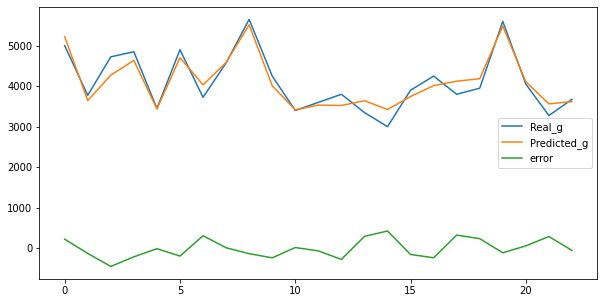

In [599]:
fig = plt.figure(facecolor='white', figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(y_val, label='Real_g')
ax.plot(pred, label='Predicted_g')
ax.plot(error_df[['error']], label='error')
ax.legend()
plt.show()

In [587]:
X =tst_df[['clength','cdepth','flength','sex','nrate','crate',
                 'i_biscoe','i_dream','i_torgersen','s_adelie','s_chin','s_gentoo',]]

In [588]:
pred = voting_regressor.predict(X)

tst_df['Body Mass (g)'] = pred

In [589]:
test= tst_df[['id','Body Mass (g)']]

In [591]:
test.head()

In [327]:
test.to_csv('dataset/predicted_test_11.csv',index=False)